<a href="https://colab.research.google.com/github/ChristianAlmBran/HBSA/blob/main/prediction_hbsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [ ]:
#Load the data S&P500
data = pd.read_csv('HBSA3.SA.csv')
#Show data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,6.81,6.88,6.51,6.61,6.61,5413900
1,2021-01-05,6.62,6.73,6.52,6.66,6.66,2235200
2,2021-01-06,6.65,6.65,6.41,6.48,6.48,1948400
3,2021-01-07,6.35,6.38,6.16,6.20,6.20,6598500
4,2021-01-08,6.19,6.45,6.16,6.37,6.37,5591700
...,...,...,...,...,...,...,...
740,2023-12-21,3.85,3.90,3.82,3.84,3.84,3043800
741,2023-12-22,3.84,3.88,3.81,3.86,3.86,3246900
742,2023-12-26,3.87,3.88,3.83,3.86,3.86,4338600
743,2023-12-27,3.87,3.95,3.85,3.95,3.95,2700500


<Axes: >

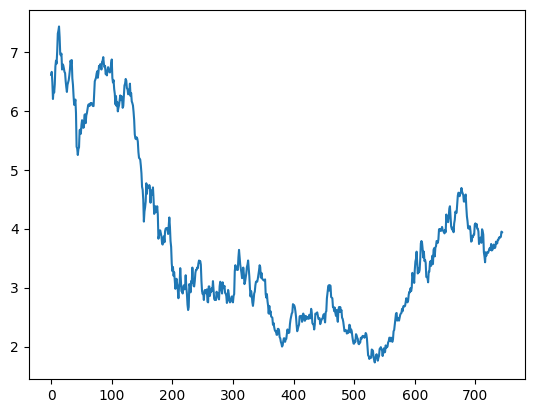

In [ ]:
#Show the data visually
data['Close'].plot()

In [ ]:
#Split the data into training and testing data sets
train_data = data.iloc[:int(.80*len(data)), :]
test_data = data.iloc[int(.80*len(data)):, :]

In [ ]:
#Define the features and target variable
features = ['Open', 'Volume']
target = 'Close'

In [ ]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[3.024171  3.3558218 3.3074105 2.9300961 3.1329653 3.1571863 3.4713829
 3.4614682 3.5079265 3.3351543 3.1935976 3.2544892 3.3818512 3.397098
 3.3564837 3.8053226 3.8876462 3.542948  3.4265547 3.5084414 3.4380033
 3.292465  3.4601188 3.1222925 3.0645602 3.0645602 2.9976528 3.0050476
 3.3189824 3.2535408 3.1842797 3.3678012 3.192934  3.4696064 3.4696064
 3.4516652 3.4532635 3.382122  3.424237  3.5694933 3.4861674 3.8102348
 3.7347808 3.7598846 3.7947671 3.9316573 3.9184015 3.8742433 4.001289
 3.8785791 3.9733822 3.9371839 3.8742433 4.0088468 3.9316573 3.952966
 3.9569697 4.307937  4.180146  4.001241  4.006451  4.2712226 4.102675
 4.157802  4.2217407 4.02002   3.9800618 3.9457965 4.02002   3.9457965
 4.011853  4.284792  4.0967593 4.202407  4.31575   4.400562  4.5654883
 4.5167956 4.701088  4.5828595 4.556894  4.674392  4.5654883 4.5132117
 4.64176   4.3998184 4.200608  4.520496  4.5828595 4.5183315 4.157802
 4.2560062 3.9569697 3.9952786 3.9316573 4.006451  3.9569697 3.

In [ ]:
#Show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
596    3.25
597    3.19
598    3.20
599    3.08
600    3.30
       ... 
740    3.84
741    3.86
742    3.86
743    3.95
744    3.94
Name: Close, Length: 149, dtype: float64


In [ ]:
#Show the models accurary
accuracy = model.score(test_data[features], test_data[target])
print('Accurary:')
print(accuracy)

Accurary:
0.8072398621474717


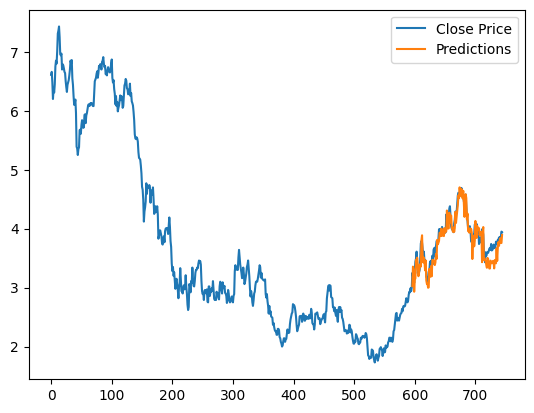

In [ ]:
#Plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()